In [ ]:
#Importing libraries required for analysis
import os
import cv2
import matplotlib.pyplot as plt
import re
from PIL import Image
import numpy as np
import pandas as pd
!pip install wordcloud
!pip install emot
!pip install emoji

!pip install -U textblob
from textblob import TextBlob

Requirement already up-to-date: textblob in c:\users\vipan\anaconda3\lib\site-packages (0.15.3)


In [ ]:
%%time
!pip install pyLDAvis
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda
import pickle 

!pip install corextopic
from corextopic import corextopic as ct

Wall time: 6.7 s


C:\Users\vipan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
#List of depressed individuals
path = "D:/study stuff/UIC/Sem - 2/IDS 594 Healthcare/Project/Final Submission/Depressed_people"
all_files = os.listdir(path)
print(all_files)

In [ ]:
#Reading text files of depressed individuals
path = "D:/study stuff/UIC/Sem - 2/IDS 594 Healthcare/Project/Final Submission/Depressed_people/"
all_files = os.listdir(path)

textlist = []
for user in all_files:
    userpath = path+ str(user)
    files = os.listdir(userpath)
    txt_files = list(filter(lambda x: x[-4:] == '.txt', files))

#Going through all the user posts and appending them to textlist
    for i in range(len(txt_files)):
        post = []
        text = open(path+str(user)+"/"+ txt_files[i],"r" ,encoding="utf8")
        for line in text:
            post.append(line.strip().lower())
        concat = "".join(post)
        textlist.append((user,concat,1))
        text.close()

textlist[0:2]

In [ ]:
#Reading text files of non-depressed individuals
path = "D:/study stuff/UIC/Sem - 2/IDS 594 Healthcare/Project/Final Submission/Normal_people/"
all_files = os.listdir(path)

non_textlist = []
for user in all_files:
    userpath = path+ str(user)
    files = os.listdir(userpath)
    txt_files = list(filter(lambda x: x[-4:] == '.txt', files))

#Going through all the user posts and appending them to textlist    
    for i in range(len(txt_files)):
        post = []
        text = open(path+str(user)+"/"+ txt_files[i],"r" ,encoding="utf8")
        for line in text:
            post.append(line.strip().lower())
        concat = "".join(post)
        non_textlist.append((user,concat,0))
        text.close()
        
non_textlist[0:5]

In [ ]:
pd.set_option('display.max_colwidth', 50)
totallist = textlist + non_textlist
text = pd.DataFrame(totallist, columns=["UserId", "Post","Depressed"]) #pd.dataframe(np.array(textlist))
text.head()

In [ ]:
posts = list(text['Post']) 
posts[0:2]

["it's time to stop it's time to stop focusing on other people's opinions of you. the only person that matters the only opinion that matters only way to succeed is to believe in yourself.#yourvalue #knowyourworth #opinions #worthy #positivity #speakup #dontjudge #bethechange #differencemaker #loveyourself #love #realtalk #speaker #instagood #whatido #passionate #motivation #inspiration",
 '10 things about me:1. i am passionate about change2. empowering woman is my destiny3. i was a single teenage mom4. i have been married twice5. i am obsessed with my dog and unicorns!6. i have overcome unhealthy relationships7. i change my haircolor based off emotions8. i love to embarrass my kids9. pumpkin spice is life!10. the water (beach) is my sanctuary.bonus:11. god has blessed my life#aboutme #10things #gettoknowme #tellmeaboutyou #insight #buildrelationships #businss #grindtowin #winning #godsplan #calling #blessed #positivetalk #blessed #proud #love #realtalk #loveyourself #speakup #raiseawar

In [ ]:
#Defining functions to apply for the Instagram DataFrame with posts

def find_mentioned(tweet):
    #'''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_hashtags(tweet):
    #'''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet) 

import emoji
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

def count_hashtags(post):
    return [Hashtags.count(w) for w in Hashtags]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

my_stopwords = nltk.corpus.stopwords.words('english')
my_stopwords.extend(['ve','th','re'])
def remove_stop_words(tweet):
    joined_tweet = []
    tweet_token_list = [word.strip() for word in tweet.split(' ')
                            if word not in my_stopwords]
    #tweet_tokens_joined = tweet_token_list.join(' ')
    return tweet_token_list

<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \s
<ipython-input-10-55903f16ca00>:5: DeprecationWarning: invalid escape sequence \s
  return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vipan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def find_senti_pos(tweet):
    #'''This function will extract postive sentiment'''
    sid = SentimentIntensityAnalyzer()
    #message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        return(scores['pos'])

def find_senti_neg(tweet):
    #'''This function will extract negative sentiment'''
    sid = SentimentIntensityAnalyzer()
    #message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        return(scores['neg'])

def find_senti_neu(tweet):
    #'''This function will extract neutral sentiment'''
    sid = SentimentIntensityAnalyzer()
    #message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        return(scores['neu'])
    
def find_senti_overall(tweet):
    #'''This function will extract overall sentiment'''
    sid = SentimentIntensityAnalyzer()
    #message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        return(scores['compound'])    

def find_senti(tweet):
    #'''This function will extract type of sentiment'''
    sid = SentimentIntensityAnalyzer()
    #message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        if scores['compound']  >= 0.05 :
          result='positive'
        elif scores['compound']  <= -0.05 :
          result='negative'
        else:
          result='neutral'
        return(result)  
    
def find_count_of_neg(tweet):
    #'''This function will find the count of negative tweets'''
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        if scores['compound']  <= -0.05 :
          result=1
        else:
          result=0
        return(result)
    
def find_count_of_posi(tweet):
    #'''This function will find the count of positive tweets'''
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        if scores['compound']  >= 0.05 :
          result=1
        else:
          result=0
        return(result)
    
def find_count_of_neu(tweet):
    #'''This function will find the count of neutral tweets'''
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(tweet)
    for key in sorted(scores):
        if scores['compound']  >= 0.05 :
          result=0
        elif scores['compound']  <= -0.05 :
          result=0
        else:
          result=1
        return(result)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
a = map(len, map(nltk.word_tokenize, posts))

text['number_of_words'] = list(a)
text['Hashtags'] = text['Post'].apply(find_hashtags)  #Finding Hashtags
text['Post_processed'] = text['Post'].map(lambda x: re.sub('[0-9•<#,%():".!?-]', ' ', x))  #Remove punctuation
text['Post_processed'] = text['Post_processed'].map(lambda x: re.sub('@\w+', ' ', x))  #Remove user mentions
text['number_of_hashtags'] = [len(x) for x in text['Hashtags']]  #Count Hashtags
text['sentimentpositive'] = text['Post_processed'].apply(find_senti_pos)
text['sentimentnegative'] = text['Post_processed'].apply(find_senti_neg)
text['sentimentneutral'] = text['Post_processed'].apply(find_senti_neu)
text['sentimentcompound'] = text['Post_processed'].apply(find_senti_overall)
text['sentimentoverall'] = text['Post_processed'].apply(find_senti)
text['polarity'] = text['Post_processed'].map(lambda text: TextBlob(text).sentiment.polarity) 
text['negativepost'] = text['Post_processed'].apply(find_count_of_neg)
text['positivepost'] = text['Post_processed'].apply(find_count_of_posi)
text['neutralpost'] = text['Post_processed'].apply(find_count_of_neu)

text.head(10)

In [ ]:
avg_words=text.groupby(['UserId']).mean()
avg_words.head()

In [ ]:
total_words = text.groupby(['UserId']).sum()
total_words.head()

In [ ]:
count_words = text.groupby(['UserId']).count()
count_words.head()

In [ ]:
##########################  Data Cleaning  #########################

#Converting Instagram posts to user level of detail from post level of detail for both raw and processed text
temp_posts = pd.DataFrame(text.groupby('UserId')['Post'].apply(lambda x: "%s" % ' '.join(x)))  
a = pd.DataFrame(text.groupby('UserId')['Post_processed'].apply(lambda x: "%s" % ' '.join(x)))

a['Post'] = temp_posts['Post']

#Replacing anything except alphabets with blank (to remove emojis)
a['Post_processed'] = a.Post_processed.str.replace('[^a-zA-Z\']', ' ')

#Getting Hashtag details at user level from post
a['Hashtags'] = a['Post'].apply(find_hashtags)
a['number_of_hashtags'] = [len(x) for x in a['Hashtags']]
a['average_hashtags_per_post'] = avg_words['number_of_hashtags']

#Getting Emojis from posts
a['Emojis'] = a['Post'].apply(extract_emojis)

#Removing stop words using NLTK english library
a['Post_processed'] = a['Post_processed'].apply(remove_stop_words).apply(lambda x: ' '.join(x))

#Appending aggregated values to user level DF
a['number_of_words'] = total_words['number_of_words']
a['average_words_per_post'] = avg_words['number_of_words']
a['Depressed'] = avg_words['Depressed']
a['avg_sentimentpositive'] = avg_words['sentimentpositive']
a['avg_sentimentnegative'] = avg_words['sentimentnegative']
a['avg_sentimentneutral'] = avg_words['sentimentneutral']
a['avg_sentimentcompound'] = avg_words['sentimentcompound']
a['cnt_neg_posts'] = total_words['negativepost']
a['cnt_neu_posts'] = total_words['neutralpost']
a['cnt_pos_posts'] = total_words['positivepost']
a['avg_polarity'] = avg_words['polarity'] 
a.head()

In [ ]:
Depressed_demographic = pd.read_excel (r'D:\study stuff\UIC\Sem - 2\IDS 594 Healthcare\Project\Final Submission\Final_Dataset_Instagram_Handles.xlsx', sheet_name='Depressed')
Normal_demographic = pd.read_excel (r'D:\study stuff\UIC\Sem - 2\IDS 594 Healthcare\Project\Final Submission\Final_Dataset_Instagram_Handles.xlsx', sheet_name='Normal')
demographics = pd.concat([Depressed_demographic,Normal_demographic])
demographics = demographics.drop(['Public_or_Private','FullName','Depressed'], axis = 1)
demographics.head()

In [ ]:
a.reset_index(level=0, inplace=True)
result = pd.merge(a,
                 demographics,
                 left_on='UserId',
                 right_on='UserID', 
                 how='left')
result = result.drop(['UserID','Post_processed','Post','Hashtags','Emojis'], axis = 1)
result.head()

In [ ]:
#Saving the initial text dataset and text dataset with demographics data for further reference

a.to_csv(r'D:\study stuff\UIC\Sem - 2\IDS 594 Healthcare\Project\Final Submission\TextModellingDataInput.csv', index = True)
result.to_csv(r'D:\study stuff\UIC\Sem - 2\IDS 594 Healthcare\Project\Final Submission\RDataInput.csv', index = False)

# Modelling

In [ ]:
#Extracting word features out of the processed text
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(a.Post_processed).toarray()
labels = a.Depressed
features.shape

(99, 10695)

In [ ]:
#Importing required packages and creating data splits for training and testing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(a['Post_processed'], a['Depressed'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

                model_name  fold_idx  accuracy  precision  recall
0   RandomForestClassifier         0  0.750000   0.777778     0.7
1   RandomForestClassifier         1  0.800000   0.800000     0.8
2   RandomForestClassifier         2  0.950000   1.000000     0.9
3   RandomForestClassifier         3  0.700000   0.750000     0.6
4   RandomForestClassifier         4  0.842105   1.000000     0.7
5                LinearSVC         0  0.950000   1.000000     0.9
6                LinearSVC         1  1.000000   1.000000     1.0
7                LinearSVC         2  1.000000   1.000000     1.0
8                LinearSVC         3  0.900000   0.900000     0.9
9                LinearSVC         4  0.894737   1.000000     0.8
10           MultinomialNB         0  0.950000   0.909091     1.0
11           MultinomialNB         1  0.850000   0.769231     1.0
12           MultinomialNB         2  1.000000   1.000000     1.0
13           MultinomialNB         3  0.850000   0.769231     1.0
14        

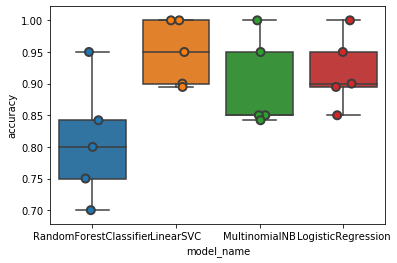

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,solver='lbfgs'),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  precisions = cross_val_score(model, features, labels, scoring='precision', cv=CV)  
  recalls = cross_val_score(model, features, labels, scoring='recall', cv=CV)
  appended = []
  for i in range(len(accuracies)):
    appended.append((accuracies[i],precisions[i],recalls[i]))
    
  for fold_idx, appended in enumerate(appended):
    entries.append((model_name, fold_idx, appended[0],appended[1],appended[2]))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy','precision','recall'])
print(cv_df)
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').mean()

,fold_idx,accuracy,precision,recall
model_name,,,,
LinearSVC,2,0.948947,0.980000,0.92
LogisticRegression,2,0.918947,0.925455,0.92
MultinomialNB,2,0.898421,0.867288,0.96
RandomForestClassifier,2,0.808421,0.865556,0.74


# Choosing Model

**From the above values of evaluation metrics (accuracy, precision and recall) it is clear that _Linear SVC_ model suits better for analyzing the instagram posts. We build the model on the training data as the final model.

In [ ]:
#Building model using Linear SVC algorithm
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, a.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Printing the cofusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[17  3]
 [ 2 11]]


In [ ]:
#Printing the data points that were misclassified by the model
category_id_df = pd.DataFrame({'Name':['Depressed','Non-Depressed'],'Value':[1.0,0.0]})
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Value', 'Name']].values)

from IPython.display import display
for predicted in a.Depressed.unique():
  for actual in a.Depressed.unique():
    if predicted != actual:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted],conf_mat[int(actual), int(predicted)]))
      df =  pd.DataFrame(a.loc[indices_test[(y_test == actual) & (y_pred == predicted)]])
      if int(conf_mat[int(actual), int(predicted)]) >= 1 :
          display(df[[ 'Depressed','Post']])
      print('')

In [ ]:
#Saving the misclassified posts into a file to analyze and understand them better
print(df[['Post']])
df.to_csv(r'D:\study stuff\UIC\Sem - 2\IDS 594 Healthcare\Project\Final Submission\Misclassified.csv', index = True)

In [ ]:
#Getting the evaluation metrics for Depressed and Non-Depressed classes for better analysis

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred,target_names= ['Non-Depressed','Depressed'] ))

In [ ]:
#Extracting the DataFrame created to an excel for Exploratory Data Analysis in R

a.reset_index(level=0, inplace=True)  #To convert UserID which is index into a column at the same position
DataFrame = a[['UserId', 'number_of_hashtags','average_hashtags_per_post','number_of_words', 'average_words_per_post','Depressed']]
DataFrame.to_csv(r'D:\study stuff\UIC\Sem - 2\IDS 594 Healthcare\Project\DataFrame.csv', index = False)

In [ ]:
#Prearing a long string with all the posts of Depressed individuals
Depressed = a.loc[ a['Depressed'] == 1.0 ]
long_string = ' '.join(Depressed['Post'])
import emoji
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)
emojis = extract_emojis(long_string)
emojis[0:30]

'😊❤☕☕🦄🦄🐶👇😊❤⏰❤❤👇👇👇👇👇👇👇👇👇👇👇👇❤😣🦄😁😁'

In [ ]:
#Getting the most used emojis by depressed individuals
emojifreq = [emojis.count(w) for w in emojis]
emojifrequency = list(set(zip(emojis, emojifreq)))
emojifrequency.sort(key=lambda x: x[1],reverse=True)
emojidf = pd.DataFrame(emojifrequency, columns=["Emoji", "Frequency"])
print(emojifrequency[0:5])
emojidf.head(10)

[('🏻', 1326), ('❤', 1196), ('💛', 783), ('😂', 677), ('🎼', 455)]


,Emoji,Frequency
0,🏻,1326
1,❤,1196
2,💛,783
3,😂,677
4,🎼,455
5,♀,431
6,🔥,424
7,🏼,366
8,🤣,257
9,🏽,255


# Topic Modelling

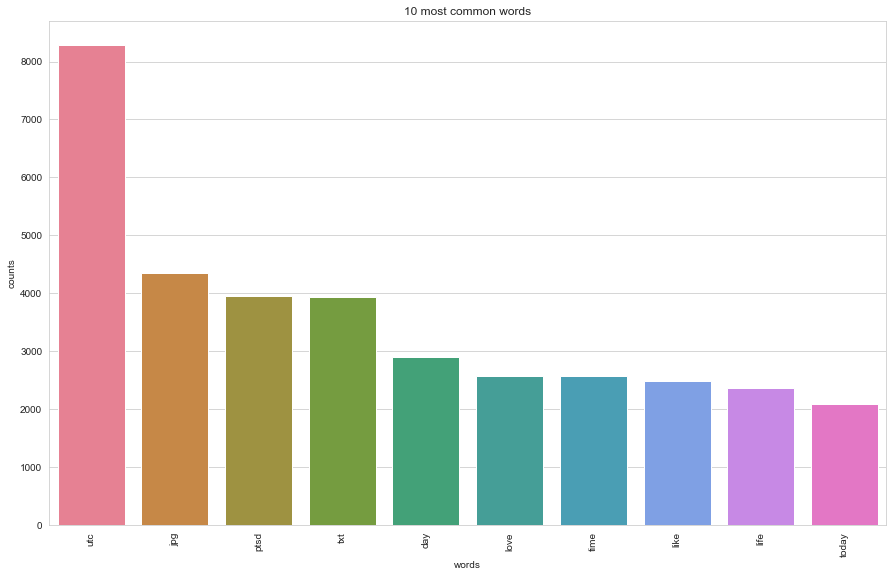

In [ ]:
# Load the library with the CountVectorizer method to get the most frequest words
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(Depressed['Post_processed']) #Using only the posts of "Depressed" individuals
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

# Latent Dirichlet Allocation (Unsupervised LDA)

In [ ]:
#Performing LDA using sklearn
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 4
number_words = 30
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
utc jpg txt adhd ptsd adhdlife love mentalhealth teensandme life like day adhdwomen anxiety adhdproblems time today adhdmom know ptsdsurvivor people mentalhealthawareness portraits agoraphobia personalgrowth feel selfawareness want selfhelp ptsdrecovery

Topic #1:
ptsd crossfit ptsdrecovery day blessed barbelltherapy music love mentalhealth time ndairborneveteran christianrap fitness snatch oly paytheman chh christianathlete esv mental myjourney army work scriptureoftheday today anxiety good norwich ptsavesvets forhisglory

Topic #2:
ptsd day like time life love today know good new people help ptsdawareness make way feel work family little things got thewanderlustfulwidow think years home days need want going look

Topic #3:
raccoonandsquirrel homeschoolmom love time today punkymoms day like life new little selfie crochet monstrouslygood got trauma makersgonnamake emdr cptsd ve years communityovercompetition work adhd greekgirl suicideprevention pittsbu

In [ ]:
#Creating the .html file for LDA to visualize the topics on first and second principal components (PC1 and PC2)

LDAvis_data_filepath = os.path.join('./LDA_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './LDA_'+ str(number_topics) +'.html')

# Correlation Explanation (CorEx algorithm WITHOUT anchor words)

In [ ]:
#Correlation Explanation (CorEx) WITHOUT anchor words
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    max_df=.5,
    min_df=10,
    max_features=None,
    ngram_range=(1, 2),
    norm=None,
    binary=True,
    use_idf=False,
    sublinear_tf=False
)
vectorizer = vectorizer.fit(Depressed['Post_processed'])
tfidf = vectorizer.transform(Depressed['Post_processed'])
#vectorizer = vectorizer.fit(text['Post_processed'])
#tfidf = vectorizer.transform(text['Post_processed'])
pd.DataFrame(tfidf)

vocab = vectorizer.get_feature_names()
print(len(vocab))

anchors = []
model = ct.Corex(n_hidden=5, seed=42)
model = model.fit(tfidf, words=vocab)

for i, topic_ngrams in enumerate(model.get_topics(n_words=30)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

2419
Topic #1: keeping, build, ways, struggles, sign, kick, including, woman, talked, throw, proper, began, doctor, ended, importantly, increase, filled, make sure, public, felt like, instead, changing, usually, grew, form, entire, imagine, went back, potential, discuss
Topic #2: shared, several, none, final, intentions, sending, july, perfectly, mid, law, arrived, originally, events, afternoon, actual, particularly, convinced, efforts, runs, add, member, despite, content, tiny, international, setting, image, return, evening, feet
Topic #3: offer, system, one thing, hide, page, broken, twice, planning, understanding, problems, throwing, shopping, results, level, team, woke, eye, tried, complete, hardest, go away, time work, jumping, hung, time time, race, kicked, come back, sight, zone
Topic #4: dress, dreams, whatever, go back, lately, posted, gifts, comfortable, crap, butt, core, donated, get rid, choose, co, kid, plus, grown, wrapped, relax, pushing, filter, time go, ring, progress,

# Correlation Explanation(CorEx algorithm WITH anchor words- Supervised)

In [ ]:
# Anchors designed to nudge the model towards measuring specific genres
anchors = [
     #Causes
    ["accident", "assault","abuse","trauma","war","loss","torture","lost"],
     #Symptoms
    ["anxiety","ptsd","depression","insomnia","sleep","irritability","irritated","mental","illness"], 
     #Coping Mechanisms
    ["positive","meditation","love","loved ones","family","kids","suport","art","emotions"], 
     #Treatment options
    ["therapy","paroxetine","sertraline","amitriptyline","phenelzine","antidepressant","mediciene","depressant"],
     #Physical
    ["pain","sweat","sick","tremble","harm","drugs","alcohol","dizzy","ache"]
]
anchors = [
    [a for a in topic if a in vocab]
    for topic in anchors
]

model = ct.Corex(n_hidden=5, seed=42)
model = model.fit(
    tfidf,
    words=vocab,
    anchors=anchors, # Pass the anchors in here
    anchor_strength=3 # Tell the model how much it should rely on the anchors
)

for i, topic_ngrams in enumerate(model.get_topics(n_words=30)):
    topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
    print("Topic #{}: {}".format(i+1, ", ".join(topic_ngrams)))

Topic #1: abuse, accident, loss, woman, doctor, ended, talked, public, make sure, trauma, even though, relationship, biggest, multiple, discuss, attitude, professional, searching, specifically, come together, years later, question, lack, routine, killing, years old, understanding, covered, intense, extra
Topic #2: illness, moved, none, level, invited, twice, planning, tried, eye, mentally, come back, potential, hide, sit, shopping, plans, broken, idea, page, followers, noticed, let know, planned, online, worked, breaking, image, quality, quote, nearly
Topic #3: keeping, meditation, ways, emotions, build, went back, including, struggles, instead, usually, february, kick, fit, approach, per, importantly, increase, slowly, proper, began, continued, chose, walked, balance, motivation, clear, prior, leg, frozen, attached
Topic #4: control, memory, overwhelmed, form, fresh, function, therapy, healing, challenging, task, feeling like, happening, marriage, loved one, previously, fear, round, q